In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import itertools
import pandas as pd
import numpy as np
from random import gauss

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge

import warnings
import itertools
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

warnings.simplefilter(action='ignore', category= FutureWarning)

import plotly.graph_objs as go

In [6]:
data2=pd.read_csv('/kaggle/input/trddaat/SP500 (1).csv')

In [9]:
data=pd.read_csv('/kaggle/input/trddaat/SP500 (1).csv')

In [7]:
len(data2)

2516

In [10]:
df=data[:1256]

<Figure size 1000x500 with 0 Axes>

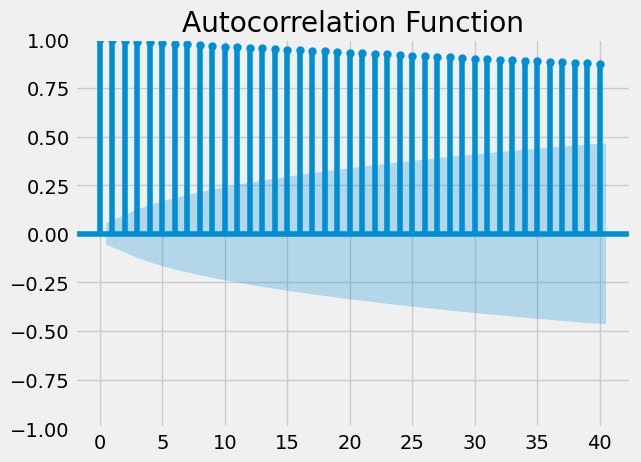

<Figure size 1000x500 with 0 Axes>

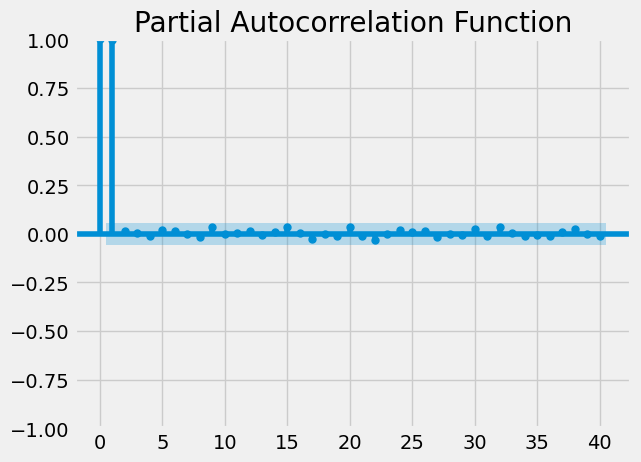

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the data
 # Replace 'your_data.csv' with your actual file path
column_data = data2['Close']    # Replace 'your_column' with the name of your column

# Plot ACF
plt.figure(figsize=(10, 5))
plot_acf(column_data, lags=40)
plt.title('Autocorrelation Function')
plt.show()

# Plot PACF
plt.figure(figsize=(10, 5))
plot_pacf(column_data, lags=40, method='ywm')
plt.title('Partial Autocorrelation Function')
plt.show()


In [39]:
result = adfuller(data['change'])

# Extract results
adf_statistic = result[0]
p_value = result[1]
print(p_value)

2.90366106781806e-30


In [11]:
df['shift']=df['Close'].shift(1)

/tmp/ipykernel_34/1693448036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['shift']=df['Close'].shift(1)


In [12]:
data=df

<Axes: >

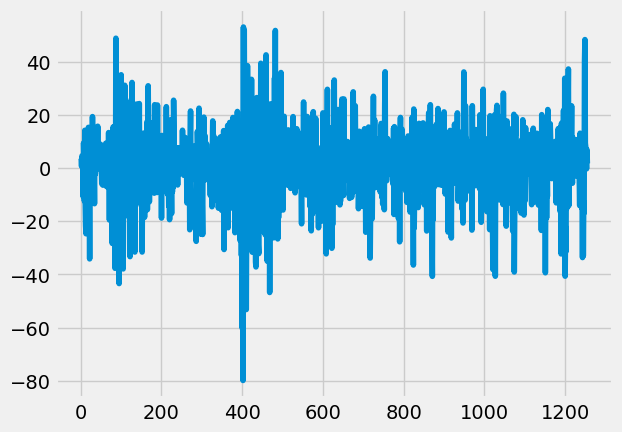

In [36]:
df['change'].plot()

In [13]:
data['change'] = data['Close'].pct_change()
data['ma7'] = data['Close'].rolling(window=7).mean()
data['ma14'] = data['Close'].rolling(window=14).mean()
data['ma30'] = data['Close'].rolling(window=30).mean()
data = data.dropna()

In [14]:
data['diff_close'] = data['Close'].diff()
data = data.dropna()

/tmp/ipykernel_34/2150308296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['diff_close'] = data['Close'].diff()


In [15]:
df['change']=df['Close']-df['shift']

In [16]:
data=data.drop(columns=['Date'])

In [18]:
data2=data2[1258:]

In [19]:
data2['shift']=data2['Close'].shift(1)

In [20]:
data2['change'] = data2['Close'].pct_change()
data2['ma7'] = data2['Close'].rolling(window=7).mean()
data2['ma14'] = data2['Close'].rolling(window=14).mean()
data2['ma30'] = data2['Close'].rolling(window=30).mean()
data2 = data2.dropna()

In [21]:
data2['diff_close']=data2['Close'].diff()
data2=data2.dropna()

MAE: 1.119317142066064
MSE: 3.9461396689890043
RMSE: 1.9864892823745626


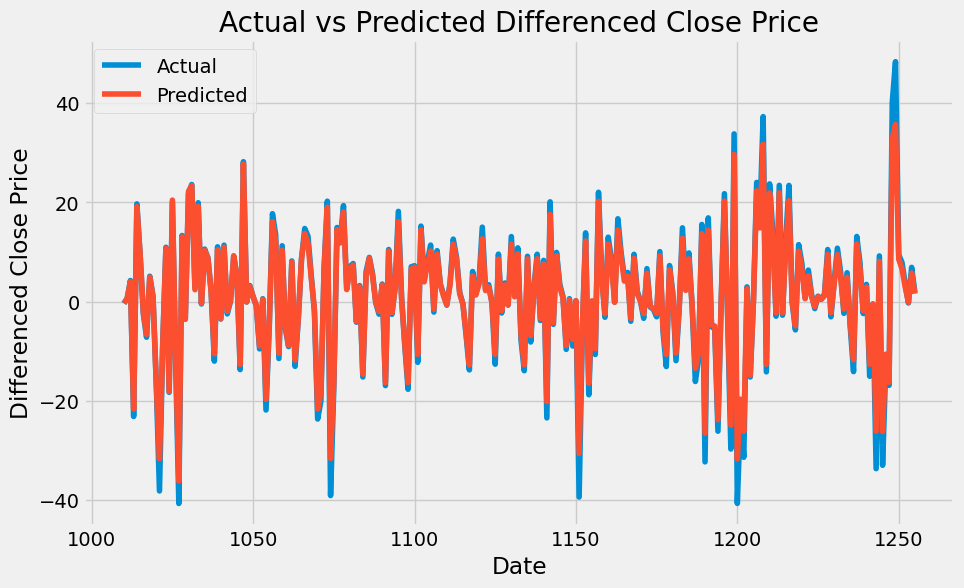

In [24]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# # Load your data
# data = pd.read_csv('your_stock_data.csv')

# # Differencing to make the data stationary
# data['diff_close'] = data['close'].diff()
# data = data.dropna()

# # Check for stationarity
# result = adfuller(data['diff_close'])
# print(f'ADF Statistic: {result[0]}')
# print(f'p-value: {result[1]}')

# # If p-value < 0.05, we can reject the null hypothesis that the series is non-stationary

# # Feature engineering
# data['change'] = data['close'].pct_change()
# data['ma7'] = data['close'].rolling(window=7).mean()
# data['ma14'] = data['close'].rolling(window=14).mean()
# data['ma30'] = data['close'].rolling(window=30).mean()
# data = data.dropna()

# # Define features and target
# features = ['open', 'high', 'low', 'adjclose', 'volume', 'change', 'ma7', 'ma14', 'ma30']
# target = 'diff_close'

X = data.drop(columns=['diff_close'])
y = data['diff_close']

# Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
split_index = int(0.8 * len(data))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
# Initialize and train the model
modelx = XGBRegressor(n_estimators=100, random_state=42)
modelx.fit(X_train, y_train)

# Make predictions
y_predx = modelx.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_predx)
mse = mean_squared_error(y_test, y_predx)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_predx, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.title('Actual vs Predicted Differenced Close Price')
plt.legend()
plt.show()


MAE: 1.0365859170347318e-13
MSE: 1.9002789466854407e-26
RMSE: 1.9864892823745626


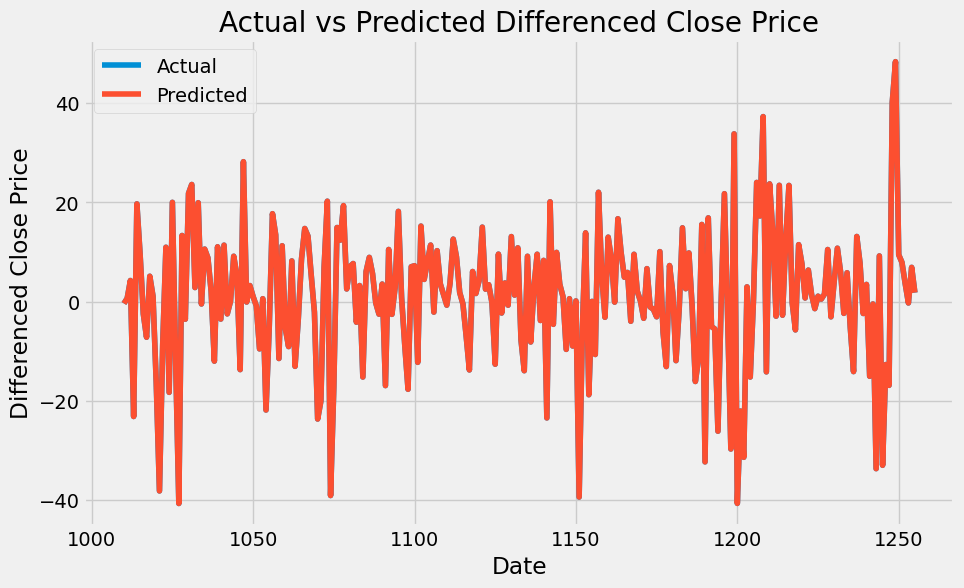

In [25]:
from sklearn.linear_model import LinearRegression

modellr = LinearRegression()
modellr.fit(X_train, y_train)

# Make predictions
y_predlr = modellr.predict(X_test)

# Evaluate the model
maelr = mean_absolute_error(y_test, y_predlr)
mselr = mean_squared_error(y_test, y_predlr)
rmselr = np.sqrt(mse)

print(f'MAE: {maelr}')
print(f'MSE: {mselr}')
print(f'RMSE: {rmselr}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_predlr, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.title('Actual vs Predicted Differenced Close Price')
plt.legend()
plt.show()

In [28]:
X2 = data2.drop(columns=['diff_close','Date'])
y2 = data2['diff_close']

MAE: 2.5672381846634256e-13
MSE: 1.0322360808540183e-25
RMSE: 3.212843103629585e-13


ValueError: x and y must have same first dimension, but have shapes (246,) and (1228,)

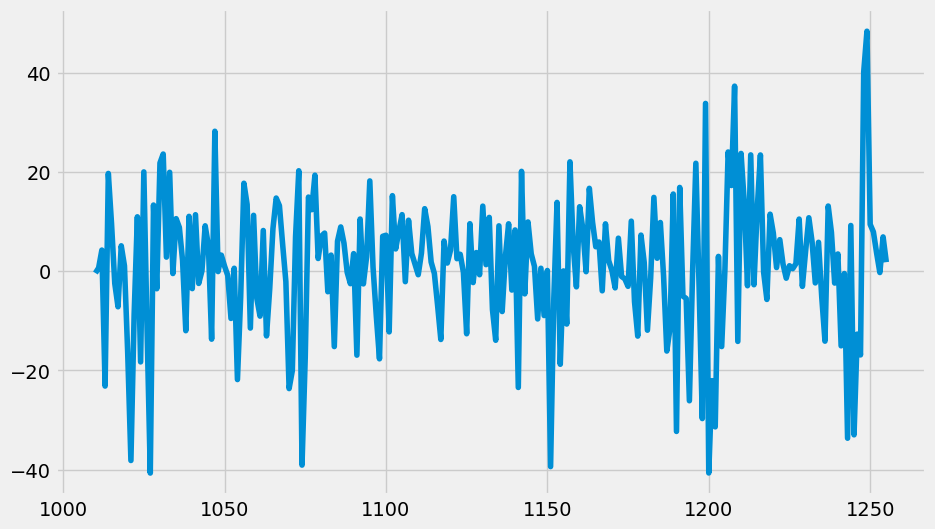

In [30]:
y_pred2=modellr.predict(X2)
mae = mean_absolute_error(y2, y_pred2)
mse = mean_squared_error(y2, y_pred2)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred2, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.title('Actual vs Predicted Differenced Close Price')
plt.legend()
plt.show()


In [31]:
data['diff_predlr']=modellr.predict(X)
data2['diff_predlr']=modellr.predict(X2)
data2['Close_predlr'] = data2['Close'].iloc[0] +data2['diff_predlr'].cumsum()
data['Close_predlr'] = data['Close'].iloc[0] +data['diff_predlr'].cumsum()

<Axes: >

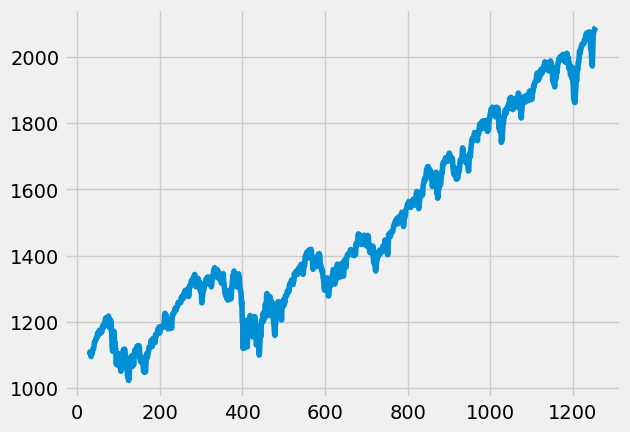

In [32]:
data['Close'].plot()

<Axes: >

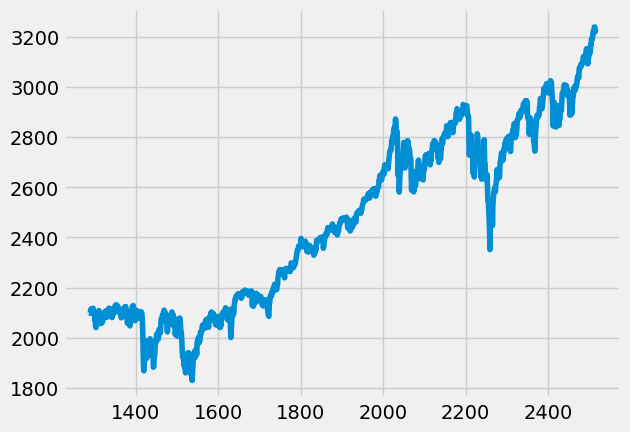

In [40]:
data2['Close'].plot()

<Axes: >

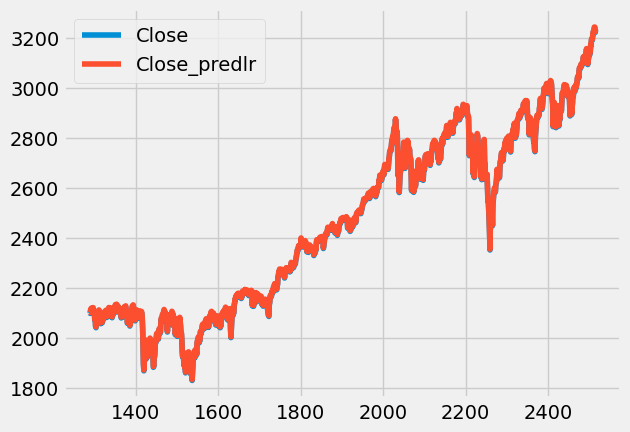

In [33]:
data2[['Close','Close_predlr']].plot()